In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


In [42]:
df = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv')
df

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [43]:
data = pd.concat([df,test])

In [44]:
sensors = df.iloc[:,3:].columns.tolist()

In [45]:
labels = pd.read_csv('../input/tabular-playground-series-apr-2022/train_labels.csv')
df = pd.merge(df,labels,on='sequence',how='left')

In [46]:
grpbysub = df.groupby('subject').first()
grpbysub

,sequence,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
subject,,,,,,,,,,,,,,,,
0,207,0,0.590417,0.633403,1.000000,0.393805,-0.656511,0.018699,0.485428,0.100000,-0.3,0.124277,0.431676,0.536008,-0.135124,0
1,195,0,-0.020093,-0.067227,0.526882,0.932743,0.575863,-0.359013,0.213115,0.796947,0.3,-0.039740,0.209795,0.572016,-8.395993,1
2,162,0,2.582689,-0.724790,1.333333,2.583186,-0.913508,0.252057,1.984517,3.568702,0.4,1.919798,-0.784307,-0.628601,96.562660,0
3,973,0,-0.102782,0.090336,0.433693,0.173451,-3.295100,0.122663,0.014572,-0.010687,0.6,-0.219653,-0.898472,0.507202,-0.005968,0
4,10,0,-0.148377,-0.098739,0.415388,0.615044,0.244577,0.163800,-0.146630,0.712977,0.8,-0.195809,0.104084,0.574074,-0.090793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,190,0,-2.746522,3.739496,-1.332820,-3.879646,0.434625,0.068811,-1.535519,-3.739695,0.8,-0.773844,1.302028,0.820988,0.308184,0
668,685,0,-0.907264,-0.752101,-0.332820,-1.215929,0.709996,0.499626,-1.245902,-1.464885,-0.1,-0.067197,2.383221,-0.648148,0.164535,0
669,2035,0,-0.123648,1.608193,-2.332306,0.127434,-0.259195,1.434555,0.333333,0.196183,-2.3,-0.465318,-0.226877,1.137860,0.001705,0


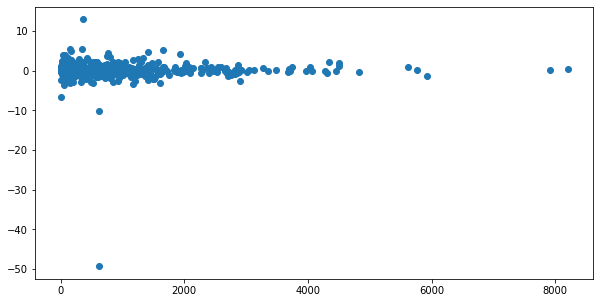

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(x=grpbysub['sequence'],y=grpbysub['sensor_00'])

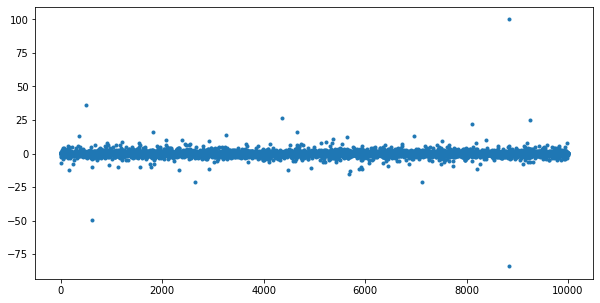

In [48]:
grpbyseq = df.groupby('sequence').first()
plt.figure(figsize=(10,5))
plt.scatter(x=grpbyseq.loc[:10000].index,y=grpbyseq.loc[:10000,'sensor_00'],marker='.')

<AxesSubplot:xlabel='subject', ylabel='Density'>

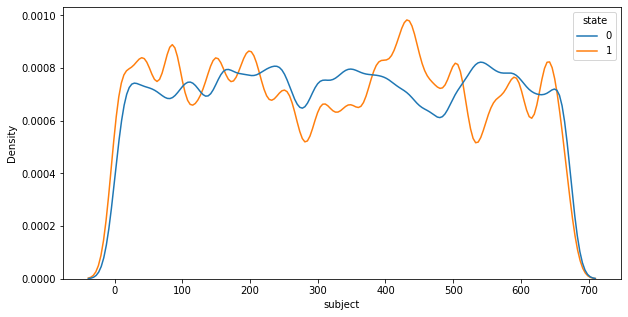

In [49]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='subject',hue='state',data=df)

In [50]:
from scipy.fft import fft, fftfreq

In [51]:
def create_features(df):
#     df['sensor_02_num'] = df['sensor_02'] > -15
#     df['sensor_02_num'] = df['sensor_02_num'].astype(int)
#     df['sensor_sum1'] = (df['sensor_00'] + df['sensor_09'] + df['sensor_06'] + df['sensor_01'])
#     df['sensor_sum2'] = (df['sensor_01'] + df['sensor_11'] + df['sensor_09'] + df['sensor_06'] + df['sensor_00'])
#     df['sensor_sum3'] = (df['sensor_03'] + df['sensor_11'] + df['sensor_07'])
#     df['sensor_sum4'] = (df['sensor_04'] + df['sensor_10'])
    for sensor in sensors:
#         scaler = StandardScaler()
#         df[sensor] = scaler.fit_transform(df[sensor].array.reshape(-1,1))
#         df[f'fft_{sensor}'] = np.abs(fft(df[sensor].values))
#         df[f'{sensor}_max'] = df.groupby(['sequence','subject'])[sensor].transform('max')
#         df[f'{sensor}_min'] = df.groupby(['sequence','subject'])[sensor].transform('min')
#         df[f'{sensor}_std'] = df.groupby(['sequence','subject'])[sensor].transform('std')
#         df[f'{sensor}_mean'] = df.groupby(['sequence','subject'])[sensor].transform('mean')
#         df[f'{sensor}_median'] = df.groupby(['sequence','subject'])[sensor].transform('median')
#         df[f'{sensor}_diff'] = df.groupby(['sequence','subject'])[sensor].diff()
#         df[f'{sensor}_diff'].fillna(df[f'{sensor}_diff'].median(),inplace=True)
        df[f'{sensor}_lag'] = df.groupby('sequence')[sensor].shift(1)
        df.fillna(0, inplace=True)
        df[f'{sensor}_diff'] = df[sensor] - df[f'{sensor}_lag']
    return df
data = create_features(data)

In [52]:
features = data.iloc[:,3:].columns.tolist()
features

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_00_lag',
 'sensor_00_diff',
 'sensor_01_lag',
 'sensor_01_diff',
 'sensor_02_lag',
 'sensor_02_diff',
 'sensor_03_lag',
 'sensor_03_diff',
 'sensor_04_lag',
 'sensor_04_diff',
 'sensor_05_lag',
 'sensor_05_diff',
 'sensor_06_lag',
 'sensor_06_diff',
 'sensor_07_lag',
 'sensor_07_diff',
 'sensor_08_lag',
 'sensor_08_diff',
 'sensor_09_lag',
 'sensor_09_diff',
 'sensor_10_lag',
 'sensor_10_diff',
 'sensor_11_lag',
 'sensor_11_diff',
 'sensor_12_lag',
 'sensor_12_diff']

In [53]:
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [54]:
data

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,...,sensor_08_lag,sensor_08_diff,sensor_09_lag,sensor_09_diff,sensor_10_lag,sensor_10_diff,sensor_11_lag,sensor_11_diff,sensor_12_lag,sensor_12_diff
0,0,47,0,-0.071577,0.025398,0.527133,0.077786,-0.573614,-0.081093,-0.037586,...,0.000016,-0.012581,-0.000495,-0.229993,0.000031,-0.433010,0.000790,0.075728,0.000021,0.098504
1,0,47,1,-0.162994,0.030337,0.527133,-0.153988,0.093636,0.213528,-0.061907,...,-0.021580,0.037716,-0.366861,0.158109,-0.501634,0.469449,0.120762,-0.108707,0.120807,-0.088779
2,0,47,2,0.118849,-0.155230,0.527133,0.077994,0.271536,0.800437,-0.027858,...,0.043208,0.150887,-0.115019,0.311040,0.042165,0.161146,-0.051422,-0.050550,0.011572,-0.107271
3,0,47,3,0.190294,0.168396,0.527133,0.229810,-0.321286,-0.448553,0.235614,...,0.302358,-0.213773,0.380426,-0.476717,0.228806,-0.388365,-0.131481,0.274958,-0.120374,0.107071
4,0,47,4,0.098878,0.240835,0.527133,-0.031455,0.228603,0.029098,0.166435,...,-0.064771,-0.075454,-0.378945,0.489487,-0.221139,0.548191,0.304085,-0.173897,0.010933,-0.013347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733075,38185,773,55,0.076939,0.449216,-0.482516,0.163767,-0.091489,-0.744109,0.125361,...,-0.086367,0.050291,0.744870,-0.834647,0.128370,0.059864,-0.184622,0.431120,0.669374,-2.440944
733076,38185,773,56,-0.300821,-0.552471,-0.482516,0.090040,0.083489,0.663165,-0.227016,...,0.000016,0.025142,-0.584648,-0.100166,0.197680,-0.184715,0.498314,-0.569575,-2.328774,3.395079
733077,38185,773,57,0.274679,0.329268,-0.482516,-0.293551,-0.236399,0.005752,0.269392,...,0.043208,0.025142,-0.744212,1.502933,-0.016346,0.080232,-0.403913,0.346886,1.840842,-2.203717
733078,38185,773,58,-0.068202,0.160164,-0.482516,0.018804,0.757225,0.100536,-0.117844,...,0.086399,-0.037730,1.649799,-1.277921,0.076561,-0.333580,0.145592,-0.046155,-0.865945,2.064219


In [55]:
train = data[:1558080]
test = data[1558080:]
groups = train['sequence']
train = train.drop(columns=['sequence','subject','step']).values
test = test.drop(columns=['sequence','subject','step']).values
train = train.reshape(-1, 60, train.shape[-1])
test = test.reshape(-1, 60, test.shape[-1])
labels = labels['state']

In [56]:
del data
del df

In [57]:
!pip install keras-self-attention

In [58]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import *

In [59]:
from keras_self_attention import SeqSelfAttention

def lstm_att_model():

    x_input = Input(shape=(train.shape[-2:]))
    
   
    x = Bidirectional(LSTM(512, return_sequences=True))(x_input)
    x = Bidirectional(LSTM(384, return_sequences=True))(x)
    x = SeqSelfAttention(attention_activation='sigmoid',name='attention_weight')(x)
    x = GlobalAveragePooling1D()(x)
    
    x_output = Dense(units=1, activation="sigmoid")(x)
    
    model = Model(inputs=x_input, outputs=x_output, name='alstm_model')
    
    return model

model = lstm_att_model()

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GroupKFold
BATCH_SIZE = 256
VERBOSE = False
predictions, scores = [], []
k = GroupKFold(n_splits = 5)
for fold, (train_idx, val_idx) in enumerate(k.split(train, labels, groups.unique())):
    print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)

    X_train, X_val = train[train_idx], train[val_idx]
    y_train, y_val = labels.iloc[train_idx].values, labels.iloc[val_idx].values
    
    model = lstm_att_model()
    #print('model name:',model.name)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics='AUC')

    lr = ReduceLROnPlateau(monitor="val_auc", factor=0.5, 
                           patience=2, verbose=VERBOSE, mode="max")

    es = EarlyStopping(monitor="val_auc", patience=7, 
                       verbose=VERBOSE, mode="max", 
                       restore_best_weights=True)
    
    chk_point = ModelCheckpoint(f'./TPS_model_2022_{fold+1}C.h5', 
                                monitor='val_auc', verbose=VERBOSE, 
                                save_best_only=True, mode='max')
    
    model.fit(X_train, y_train, 
              validation_data=(X_val, y_val), 
              epochs=20,
              verbose=VERBOSE,
              batch_size=BATCH_SIZE, 
              callbacks=[lr, chk_point, es])
    
    model = load_model(f'./TPS_model_2022_{fold+1}C.h5', custom_objects=SeqSelfAttention.get_custom_objects())
    
    y_pred = model.predict(X_val, batch_size=BATCH_SIZE).squeeze()
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)
    predictions.append(model.predict(test, batch_size=BATCH_SIZE).squeeze())
    print(f"Fold-{fold+1} | OOF Score: {score}")

print(f'Mean AUC on {k.n_splits} folds - {np.mean(scores)}')

--------------- > Fold 1 < ---------------
Fold-1 | OOF Score: 0.9620901780675323
--------------- > Fold 2 < ---------------
Fold-2 | OOF Score: 0.9632643571262497
--------------- > Fold 3 < ---------------
Fold-3 | OOF Score: 0.9671157514162895
--------------- > Fold 4 < ---------------
Fold-4 | OOF Score: 0.9586326511660749
--------------- > Fold 5 < ---------------
Fold-5 | OOF Score: 0.9616439368948572
Mean AUC on 5 folds - 0.9625493749342008


In [61]:
# df.drop(columns=['sequence','subject'],inplace=True)
# y = df['state'].copy()
# x = data[:1558080]
# test = data[1558080:]
# y = df['state'].copy()
# x = df.drop(columns=['state'])

In [62]:
# x

In [63]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(
#     x, y, test_size=0.3, random_state=42)

In [64]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_validate

# lgb = LGBMClassifier(random_state=42)
# lgb.fit(x_train, y_train)
# y_pred = lgb.predict(x_val)

In [65]:
# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(max_depth=50,random_state=42,max_features=None,min_samples_leaf=15)
# dtree.fit(x_train, y_train)
# y_pred = dtree.predict(x_val)

In [66]:
# splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)
# scores = cross_validate(lgb, x_train, y_train, return_train_score = True, cv=splitter)

# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [67]:
# test = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv')
# test = create_features(test)

In [68]:
# pred = dtree.predict(test)
# pred

In [69]:
submission = pd.read_csv('../input/tabular-playground-series-apr-2022/sample_submission.csv')
submission

,sequence,state
0,25968,0
1,25969,0
2,25970,0
3,25971,0
4,25972,0
...,...,...
12213,38181,0
12214,38182,0
12215,38183,0
12216,38184,0


In [70]:
# test['state'] = pred
# test

In [71]:
# t = test.groupby('sequence').mean().reset_index()
# t.loc[t['state']<0.5,'state'] = 0
# t.loc[t['state']>=0.5,'state'] = 1

In [72]:
submission['state'] = sum(predictions)/k.n_splits
submission.to_csv('submission.csv',index=False)

In [73]:
# scaler = StandardScaler()
# scaler.fit(df.iloc[:,3:])
# df.iloc[:,3:] = scaler.transform(df.iloc[:,3:])
# df
# submission.loc[submission['state']>0.5,'state']=1
# submission.loc[submission['state']<=0.5,'state']=0
# submission['state'] = submission['state'].astype(int)
# submission.to_csv('submission.csv',index=False)

In [ ]:
# fig, ax = plt.subplots(13,figsize=(15,25))
# for i in range(0,13):
#     ax[i].plot(a['sensor_'+f"{i:02d}"])

In [ ]:
# a.iloc[:,3:] = a.mean().tolist()[3:]
# a

In [ ]:
# fig, ax = plt.subplots(13,figsize=(15,25),sharey=True,sharex=True)
# for i in range(0,13):
#     ax[i].plot(a['sensor_'+f"{i:02d}"])

In [ ]:
# df.describe()

In [ ]:
# def signal(d):
#     for i in range(0,13):
#         d.loc[(d['sensor_'+f"{i:02d}"]>-0.1) & (d['sensor_'+f"{i:02d}"]<0.1),'sensor_'+f"{i:02d}"]=0
#         d.loc[(d['sensor_'+f"{i:02d}"]!=0),'sensor_'+f"{i:02d}"]=1
#     d = d.astype('int64')
#     return d
# signal(df)

In [ ]:
# def signal(d):
#     a=''
#     for i in range(0,13):
#         a = '0'+str(i)
#         if(i>=10):
#             a=str(i)
#         d.loc[(d['sensor_'+a]>-2) & (d['sensor_'+a]<2),'sensor_'+a]=0
#         d.loc[(d['sensor_'+a]!=1),'sensor_'+a]=1
#     d = d.astype('int64')
#     return d
# df = signal(df)
# test = signal(test)

In [ ]:
# a = df.groupby('subject').mean()

In [ ]:
# a[a.iloc[:,2:15]>0.5] = 1
# a[a.iloc[:,2:15]<=0.5] = 0
# a = a.astype('int')
# a

In [ ]:
# plt.figure(figsize=(25,13))
# sns.scatterplot(data=df.groupby(['sequence']).first(),x='sequence',y='sensor_00',hue='state')

In [ ]:
# df.drop(columns=['step','sequence'],inplace=True)
# df = df.astype('int')
# df

In [ ]:
# df.drop(columns=['step','sequence','subject'],inplace=True)
# test.drop(columns=['step','sequence','subject'],inplace=True)
# sns.heatmap(df.corr())

In [ ]:
# sns.histplot(df.drop_duplicates()['sequence'].value_counts())
# agg(lambda x:x.value_counts().index[0])


In [ ]:
# df = df.groupby(['sequence','subject']).agg(lambda x:x.value_counts().index[0])
# df = df.reset_index()
# df

In [ ]:
# df['sensor_03'].value_counts()

In [ ]:
# sns.heatmap(df.corr(),vmax=0.6,vmin=0.4)
# df[(df['sensor_00']==1) & (df['sensor_01']==1)]
# df[df.iloc[:,3:]==1].sum()
# df[(df['sensor_00']==1) & (df['sensor_01']==1) & (df['sensor_02']==1) & (df['sensor_03']==1) & (df['sensor_04']==1) & (df['sensor_05']==1) & (df['sensor_06']==1) & (df['sensor_07']==1) & (df['sensor_08']==1) & (df['sensor_09']==1) & (df['sensor_10']==1) & (df['sensor_11']==1) & (df['sensor_12']==1)]

In [ ]:
# fig,ax = plt.subplots()
# sns.scatterplot(data=df,x='sensor_00',y='sensor_01')
# sns.scatterplot(data=df.reset_index(),x='index',y='sensor_01')
# sns.scatterplot(data=df.reset_index(),x='index',y='sensor_02')

In [ ]:
# train_split = int(0.715*int(df.shape[0]))
# train_data = df.loc[0:train_split-1]
# val_data = df.loc[train_split:]
# x_train = train_data.drop(columns=['state']).values
# y_train = train_data['state'].values

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# encoder = LabelEncoder()
# encoder.fit(y_train)
# encoded_Y = encoder.transform(y_train)
# def create_larger():
#     model = Sequential()
#     model.add(Dense(13, input_dim=13, activation='relu'))
#     model.add(Dense(90, activation='relu'))
#     model.add(Dense(30, activation='relu'))
#     model.add(Dense(15, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# estimators = []
# # estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=15, batch_size=500, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
# print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# train_data[0:60].groupby(train_data.columns.tolist(),as_index=False).size()

In [ ]:
# print(x_train.shape)
# print(x_train.shape)
# sequence_length = int(len(df)/60)
# sampling_rate = 60
# batch_size = 256
# sequence_length

In [ ]:
# import tensorflow as tf
# dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
#     x_train,
#     y_train,
#     sequence_length=100,
#     sampling_rate=60,
#     batch_size=256,
# )
# dataset_train

In [ ]:
# import tensorflow as tf
# dataset = tf.data.Dataset.from_tensor_slices(x_train)
# print(list(dataset.as_numpy_iterator()))

In [ ]:
# dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
#     val_data.drop(columns=['state']),
#     val_data['state'],
#     sequence_length=100,
#     sampling_rate=60,
#     batch_size=256,
# )

In [ ]:
# for batch in dataset_train.take(1):
#     inputs, targets = batch

In [ ]:
# X_train = pd.concat([X_train,X_encode],axis=0)
# X_train
# from tensorflow import keras
# print("Input shape:", inputs.numpy().shape)
# print("Target shape:", targets.numpy().shape)

In [ ]:
# inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# lstm_out = keras.layers.LSTM(32)(inputs)
# outputs = keras.layers.Dense(1,activation='sigmoid')(lstm_out)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
# model.summary()

In [ ]:
# path_checkpoint = "model_checkpoint.h5"
# es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

# modelckpt_callback = keras.callbacks.ModelCheckpoint(
#     monitor="val_loss",
#     filepath=path_checkpoint,
#     verbose=1,
#     save_weights_only=True,
#     save_best_only=True,
# )

# history = model.fit(
#     dataset_train,
#     epochs=10,
#     validation_data=dataset_val,
#     callbacks=[es_callback, modelckpt_callback],
# )

In [ ]:
# X_train.sort_index(inplace=True)

In [ ]:
# X_train = X_train.drop(columns=['sequence'])
# X_train
# df['sensor_09'].value_counts()

In [ ]:
# from sklearn.model_selection import train_test_split
# train_X, test_X, train_Y, test_Y = train_test_split(df.drop(columns=['state']),df['state'],test_size=0.33,random_state=42)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(max_depth=10, random_state=42)
# rfc.fit(train_X,train_Y)

In [ ]:
# pred_rfc = rfc.predict(test_X)
# pred_rfc

In [ ]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(pred_rfc,test_Y)

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier(max_depth=13,random_state=42,eval_metric='auc',use_label_encoder=False)
# xgb.fit(train_X,train_Y)

In [ ]:
# roc_auc_score(test_Y,xgb.predict(test_X))

In [ ]:
# df_train = train_X.sample(frac=0.7, random_state=0)
# df_valid = train_X.drop(df_train.index)
# max_ = df_train['step'].max(axis=0)
# min_ = df_train['step'].min(axis=0)
# df_train['step'] = (df_train['step'] - min_) / (max_ - min_)
# df_valid['step'] = (df_valid['step'] - min_) / (max_ - min_)

In [ ]:
# y_train = Y[df_train.index]
# y_valid = Y[df_valid.index]

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

# model = keras.Sequential([
#     layers.Dense(4, activation='relu', input_shape=[16]),
#     layers.Dense(4, activation='relu'),    
#     layers.Dense(1, activation='sigmoid'),
# ])

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# history = model.fit(
#     df_train, y_train,
#     validation_data=(df_valid, y_valid),
#     batch_size=512,
#     epochs=1000,
#     callbacks=[early_stopping],
#     verbose=0,
# )